In [ ]:
from google.colab import files
import shutil

# Step 1: Manually upload the dataset ZIP file
uploaded = files.upload()

# Step 2: Move the uploaded file to Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define target Google Drive folder path (modify this if needed)
drive_folder = "/content/drive/My Drive/snapvision_dataset.zip"

# Move the uploaded file to Google Drive
uploaded_filename = list(uploaded.keys())[0]  # Get the uploaded file name
shutil.move(uploaded_filename, drive_folder)

print(f"Dataset uploaded and saved to Google Drive at: {drive_folder}")


Saving uob_image_set.zip to uob_image_set.zip
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset uploaded and saved to Google Drive at: /content/drive/My Drive/snapvision_dataset.zip


In [ ]:
from google.colab import drive
import zipfile
import os

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define dataset path in Google Drive (modify if needed)
dataset_zip_path = "/content/drive/My Drive/snapvision_dataset.zip"
extract_folder = "/content/snapvision_dataset"

# Step 3: Extract the ZIP file
os.makedirs(extract_folder, exist_ok=True)
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Dataset extracted to: {extract_folder}")


Mounted at /content/drive
Dataset extracted to: /content/snapvision_dataset


In [ ]:
import os

### 📌 Step 1: Define dataset path
dataset_path = "/content/snapvision_dataset/uob_image_set"  # Adjust as needed

# Initialize counters
total_clothing_items = 0
total_images = 0

# Iterate over clothing item folders
for clothing_item in os.listdir(dataset_path):
    item_path = os.path.join(dataset_path, clothing_item)

    if os.path.isdir(item_path):  # Ensure it's a directory
        total_clothing_items += 1  # Count as a clothing item (folder)

        # Count only image files
        num_images = len([f for f in os.listdir(item_path) if f.lower().endswith(('jpg', 'png', 'jpeg'))])
        total_images += num_images

### 📌 Step 2: Display Results
print(f"✅ Total Clothing Items (Folders): {total_clothing_items}")
print(f"✅ Total Images in Dataset: {total_images}")
print(f"📸 Average Images per Clothing Item: {total_images / total_clothing_items:.2f}")


✅ Total Clothing Items (Folders): 1500
✅ Total Images in Dataset: 6411
📸 Average Images per Clothing Item: 4.27


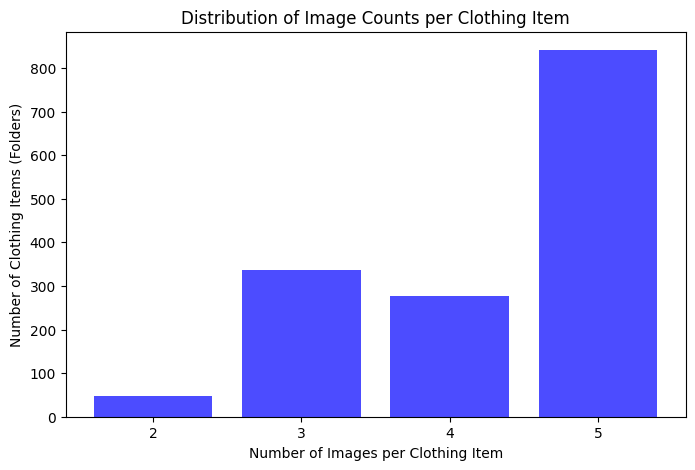

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter

### 📌 Step 1: Define the Correct Dataset Path
dataset_path = "/content/snapvision_dataset/uob_image_set"  # Adjust if needed

# Dictionary to store image count per clothing item
image_counts = []

# Iterate over clothing items (subfolders)
for clothing_item in os.listdir(dataset_path):
    item_path = os.path.join(dataset_path, clothing_item)
    if os.path.isdir(item_path):  # Ensure it's a directory
        num_images = len([f for f in os.listdir(item_path) if f.lower().endswith(('jpg', 'png', 'jpeg'))])
        image_counts.append(num_images)  # Store image count

# 📊 Step 2: Count occurrences of image counts
count_distribution = Counter(image_counts)

# Extract unique image counts
x_values = sorted(count_distribution.keys())
y_values = [count_distribution[x] for x in x_values]

# 📉 Step 3: Plot Corrected Histogram
plt.figure(figsize=(8, 5))
plt.bar(x_values, y_values, color='blue', alpha=0.7)
plt.xlabel("Number of Images per Clothing Item")
plt.ylabel("Number of Clothing Items (Folders)")
plt.title("Distribution of Image Counts per Clothing Item")
plt.xticks(x_values)
# plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


✅ Unique Image Resolutions: 2
Most common resolutions: [((1000, 1334), 6382), ((1000, 1333), 29)]


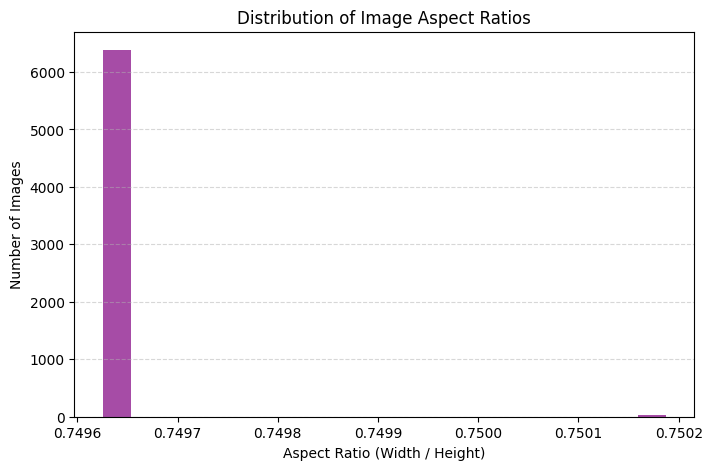

✅ No corrupted images found!


In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

### Step 1: Define dataset path
dataset_path = "/content/snapvision_dataset/uob_image_set"  # Update if needed

# Lists to store resolutions and aspect ratios
resolutions = []
aspect_ratios = []
corrupt_files = []

### Step 2: Iterate over all clothing items (folders)
for clothing_item in os.listdir(dataset_path):
    item_path = os.path.join(dataset_path, clothing_item)

    if os.path.isdir(item_path):  # Ensure it's a directory
        for img_file in os.listdir(item_path):
            img_path = os.path.join(item_path, img_file)

            # Ensure file is an image
            if img_file.lower().endswith(('jpg', 'png', 'jpeg')):
                try:
                    img = Image.open(img_path)
                    width, height = img.size
                    resolutions.append((width, height))
                    aspect_ratios.append(width / height)  # Calculate aspect ratio
                except Exception as e:
                    corrupt_files.append(img_path)  # Log corrupted files

### Step 3: Analyze Unique Resolutions
resolution_counts = Counter(resolutions)
print(f"✅ Unique Image Resolutions: {len(resolution_counts)}")
print(f"Most common resolutions: {resolution_counts.most_common(5)}")

### Step 4: Analyze Aspect Ratio Distribution
plt.figure(figsize=(8, 5))
plt.hist(aspect_ratios, bins=20, color='purple', alpha=0.7)
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Number of Images")
plt.title("Distribution of Image Aspect Ratios")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Step 5: Check for Corrupted Files
if corrupt_files:
    print(f"⚠️ Found {len(corrupt_files)} corrupted images!")
    print("Sample corrupted files:", corrupt_files[:5])
else:
    print("✅ No corrupted images found!")


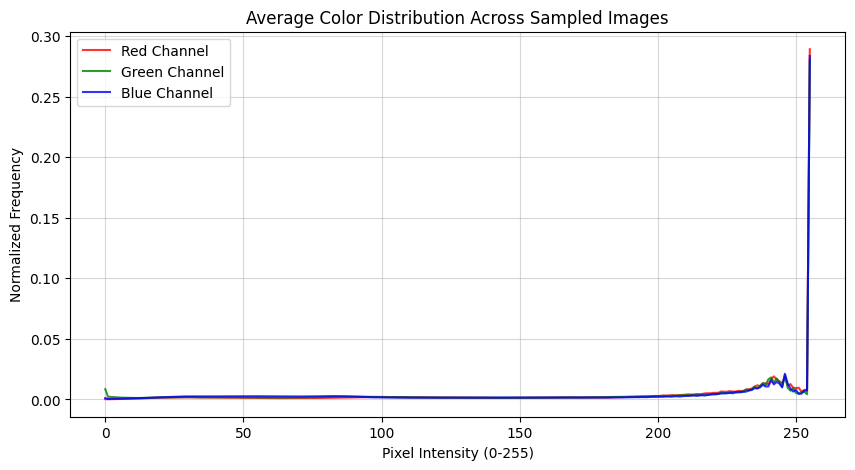

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

### 📌 Step 1: Define dataset path
dataset_path = "/content/snapvision_dataset/uob_image_set"  # Adjust as needed

# Dictionary to store color histograms per channel
color_histograms = defaultdict(list)

### 📌 Step 2: Iterate over images in the dataset
image_count = 0  # Counter to limit sample size
sample_size = 100  # Adjust this to control the number of images analyzed

for clothing_item in os.listdir(dataset_path):
    item_path = os.path.join(dataset_path, clothing_item)

    if os.path.isdir(item_path):
        for img_file in os.listdir(item_path):
            img_path = os.path.join(item_path, img_file)

            # Ensure it's an image
            if img_file.lower().endswith(('jpg', 'png', 'jpeg')):
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

                # Compute color histograms (Red, Green, Blue)
                for i, color in enumerate(('red', 'green', 'blue')):
                    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
                    hist = hist.flatten() / hist.sum()  # Normalize
                    color_histograms[color].append(hist)

                image_count += 1
                if image_count >= sample_size:  # Limit sample size for performance
                    break
        if image_count >= sample_size:
            break

### 📌 Step 3: Compute Average Histogram for Each Color Channel
avg_histograms = {color: np.mean(hists, axis=0) for color, hists in color_histograms.items()}

### 📌 Step 4: Plot Histograms
plt.figure(figsize=(10, 5))

for color, avg_hist in avg_histograms.items():
    plt.plot(avg_hist, color=color, label=f"{color.capitalize()} Channel", alpha=0.8)

plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Normalized Frequency")
plt.title("Average Color Distribution Across Sampled Images")
plt.legend()
plt.grid(alpha=0.5)

plt.show()


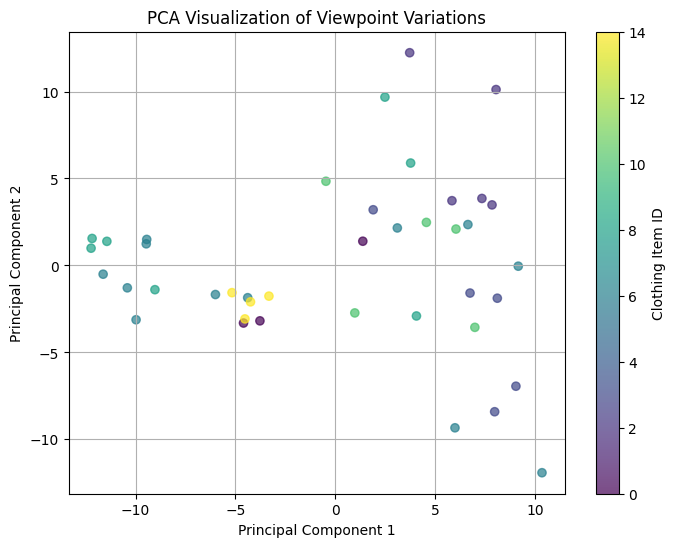

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

### 📌 Step 1: Load a Pretrained Model (ResNet-50)
model = models.resnet50(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove classification layer
model.eval()

# Define image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

### 📌 Step 2: Extract Features for Different Views of the Same Item
dataset_path = "/content/snapvision_dataset/uob_image_set"  # Adjust as needed
embeddings = []
labels = []

# Process a limited number of items for performance
max_items = 10  # Adjust based on available resources

for idx, clothing_item in enumerate(os.listdir(dataset_path)):
    item_path = os.path.join(dataset_path, clothing_item)
    if os.path.isdir(item_path) and idx < max_items:  # Limit items to process
        for img_file in os.listdir(item_path):
            img_path = os.path.join(item_path, img_file)
            if img_file.lower().endswith(('jpg', 'png', 'jpeg')):
                img = Image.open(img_path).convert("RGB")
                img = transform(img).unsqueeze(0)  # Add batch dimension

                # Extract deep features
                with torch.no_grad():
                    embedding = model(img).squeeze().numpy().flatten()

                embeddings.append(embedding)
                labels.append(clothing_item)  # Use clothing item as label

### 📌 Step 3: Compute Similarity Between Different Views
embeddings = np.array(embeddings)

# Compute cosine similarity
cosine_sim_matrix = cosine_similarity(embeddings)

# Convert similarity matrix to distance (1 - similarity)
distance_matrix = 1 - cosine_sim_matrix

# 📊 Step 4: Visualize Viewpoint Variation using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=[hash(label) % 20 for label in labels], cmap='viridis', alpha=0.7)
plt.title("PCA Visualization of Viewpoint Variations")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.colorbar(scatter, label="Clothing Item ID")
plt.show()


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 133MB/s]


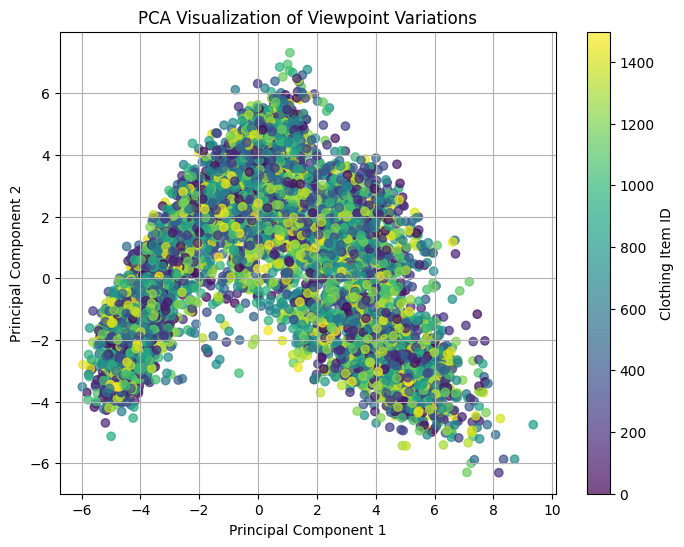

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from torchvision.models import resnet50, ResNet50_Weights

### 📌 Step 1: Load a Pretrained Model (ResNet-50)
model = resnet50(weights=ResNet50_Weights.DEFAULT)
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove classification layer
model.eval()

# Define image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

### 📌 Step 2: Extract Features for All Clothing Items
dataset_path = "/content/snapvision_dataset/uob_image_set"  # Adjust as needed
embeddings = []
labels = []

# Process all clothing items
for clothing_item in os.listdir(dataset_path):
    item_path = os.path.join(dataset_path, clothing_item)

    if os.path.isdir(item_path):  # Ensure it's a directory
        for img_file in os.listdir(item_path):
            img_path = os.path.join(item_path, img_file)
            if img_file.lower().endswith(('jpg', 'png', 'jpeg')):
                try:
                    img = Image.open(img_path).convert("RGB")
                    img = transform(img).unsqueeze(0)  # Add batch dimension

                    # Extract deep features
                    with torch.no_grad():
                        embedding = model(img).squeeze().numpy().flatten()

                    embeddings.append(embedding)
                    labels.append(clothing_item)  # Use clothing item as label

                except Exception as e:
                    print(f"⚠️ Error processing {img_path}: {e}")

### 📌 Step 3: Compute Similarity Between Different Views
embeddings = np.array(embeddings)

# Compute cosine similarity
cosine_sim_matrix = cosine_similarity(embeddings)

# Convert similarity matrix to distance (1 - similarity)
distance_matrix = 1 - cosine_sim_matrix

# 📊 Step 4: Visualize Viewpoint Variation using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=[hash(label) % 1500 for label in labels], cmap='viridis', alpha=0.7)
plt.title("PCA Visualization of Viewpoint Variations")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.colorbar(scatter, label="Clothing Item ID")
plt.show()
